In [45]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams['figure.dpi'] = 300

In [46]:
def rename(df):
    df.rename({'per_family_instance_index': 'set_size', 'family_index': 'container'}, axis=1, inplace=True)
    
def rename_col(df, col, old, new):
    df[col] = df[col].replace(old, new)

In [47]:
data = json.load(open('../results/benchmark_powerset_o2.json'))
raw = pd.DataFrame(data['benchmarks'])
rename(raw)
rename_col(raw, 'set_size', 0, '5')
rename_col(raw, 'set_size', 1, '10')
rename_col(raw, 'set_size', 2, '15')
rename_col(raw, 'set_size', 3, '20')

rename_col(raw, 'container', 0, 'TreeSet')
rename_col(raw, 'container', 1, 'HashSet')
rename_col(raw, 'container', 2, 'Vector')
rename_col(raw, 'container', 3, 'UniqueVector(Lazy)')
rename_col(raw, 'container', 4, 'UniqueVector(Eager)')

benchmarks = raw.pivot_table('cpu_time', ['set_size', ], 'container')
benchmarks = benchmarks.reindex(['5', '10', '15', '20'], axis=0)
benchmarks.replace(np.nan, np.inf, inplace=True)
pd.options.display.float_format = "{:,.3f}".format

benchmarks

container,HashSet,TreeSet,UniqueVector(Eager),UniqueVector(Lazy),Vector
set_size,,,,,
5,0.087,0.057,0.028,0.030,0.021
10,4.564,3.873,1.574,1.140,0.672
15,223.676,213.981,743.157,40.623,23.657
20,"11,602.961","9,425.953","2,248,038.876","1,881.065",945.089


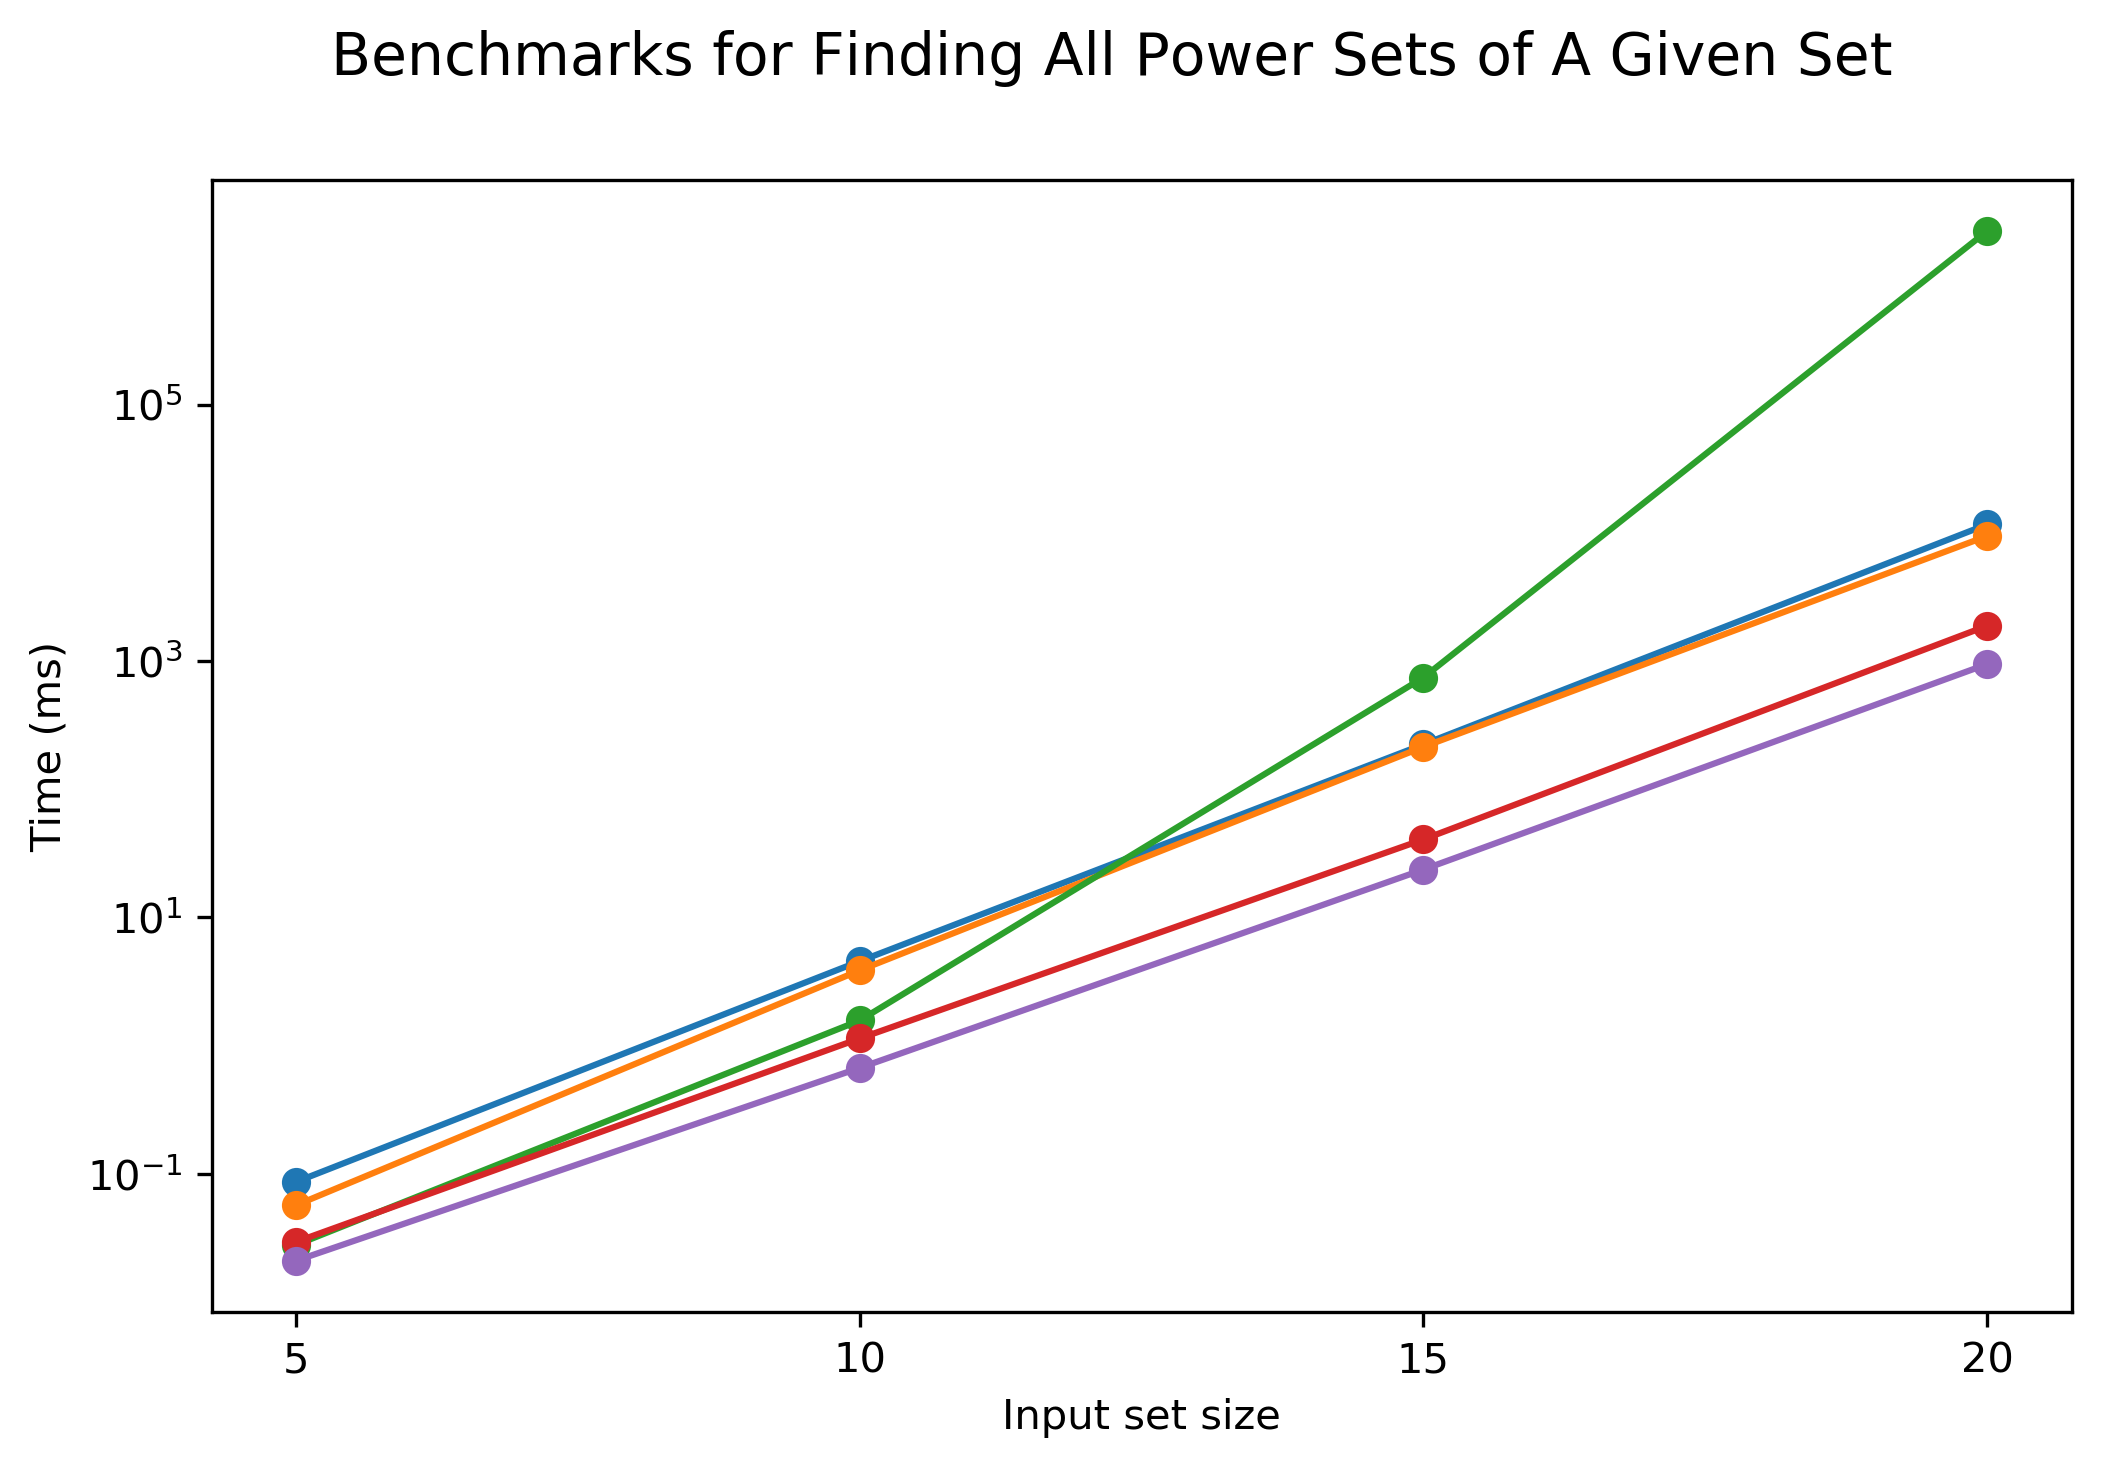

In [68]:
fig = plt.figure()
plt.plot(benchmarks, marker='o')
fig.suptitle('Benchmarks for Finding All Power Sets of A Given Set', fontsize=14)
plt.xlabel('Input set size')
plt.ylabel('Time (ms)')
plt.yscale('log')
plt.show()

